<a href="https://colab.research.google.com/github/swetzel1/introduction_to_ml/blob/main/homework_2/hw2_problem2b_min_max.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#read data from csv file
file_path = '/content/drive/My Drive/Intro_to_ML/Datasets/Housing.csv'
df = pd.read_csv(file_path)

from IPython.display import display
display(df)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
#select required parameters
varlist =  ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
df = df[varlist]
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no


In [4]:
# List of variables to map
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)
df.head()

<ipython-input-4-98703877deb7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[varlist] = df[varlist].apply(binary_map)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

df[num_vars] = scaler.fit_transform(df[num_vars])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1
1,12250000,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0
2,12250000,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1
3,12215000,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1
4,11410000,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0


In [6]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_val = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [7]:
y_train = df_train.pop('price') # seperate x from y
y_val = df_val.pop('price')

y_train = y_train.to_numpy() # convert to numpy array for matrix multiplication
y_val = y_val.to_numpy()


x_train = df_train.to_numpy()
x_val = df_val.to_numpy()



X_0 = np.ones((len(y_train), 1)) # put together input vector
x_train = np.hstack((X_0, x_train))

tmp = np.ones((len(x_val), 1))
x_val = np.hstack((tmp, x_val))

In [8]:
def compute_loss(X, y, theta):

    m = len(y)

    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [9]:
def gradient_descent(x_train, y_train, x_val, y_val, theta, alpha, iterations):

    m = len(y_train)  # Number of training examples
    training_loss_history = np.zeros(iterations)
    validation_loss_history = np.zeros(iterations)


    for i in range(iterations):

        predictions = np.dot(x_train, theta)
        theta = theta - (1/m)*alpha*(x_train.T.dot(predictions-y_train))

        training_loss_history[i] = compute_loss(x_train, y_train, theta)
        validation_loss_history[i] = compute_loss(x_val, y_val, theta)


    return theta, training_loss_history, validation_loss_history

In [10]:
def predict_value(x1,x2,x3, theta):
  input = np.array([1, x1, x2, x3])
  pred_val = input.dot(theta)

  return pred_val

In [13]:
#run gradient decent

theta = np.zeros(x_train.shape[1]) #initalize theta

iterations = 200
alpha = 0.08

theta, training_loss_history, validation_loss_history = gradient_descent(x_train, y_train, x_val, y_val, theta, alpha, iterations)
print('Final value of theta =', theta)
#print('loss_history =', training_loss_history[:5], '...')

Final value of theta = [1755471.31613007 1320267.22076445 1068990.82490931 1458944.11514438
 1292271.92857737  982816.71171183  539758.03331157  326732.91118629
  644451.65658481 1080564.19967509 1022477.96565085  656748.40676766]


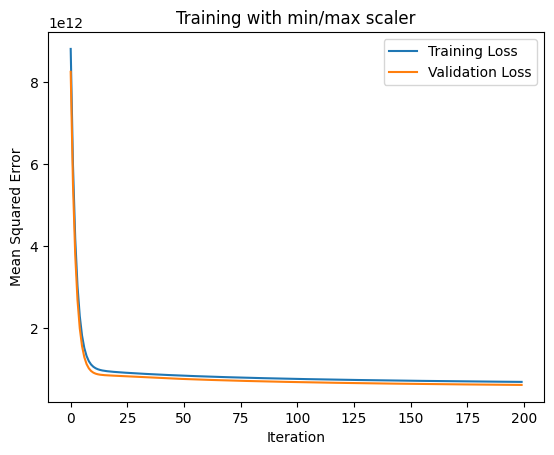

In [14]:
# Plot the training and validation loss after each iteration
plt.plot(training_loss_history, label="Training Loss")
plt.plot(validation_loss_history, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training with min/max scaler")
plt.show()